In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import numpy as np
from PIL import Image
from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, ImageColorGenerator


## wordcloud a partir de palabras de un libro de programacion en python
    titulo: Python para todos
    autor: Raúl González Duque

In [14]:

import PyPDF2
from PyPDF2 import PdfFileReader
pdf = open('0440afdb-0883-4bf4-be5b-1a2246514d46.pdf','rb')
pdf_reader = PyPDF2.PdfFileReader(pdf)
###
texto = []
for i in range(pdf_reader.numPages):
    texto.append(pdf_reader.getPage(i).extractText().replace('\n',' '))


In [16]:
texto = ' '.join(texto)

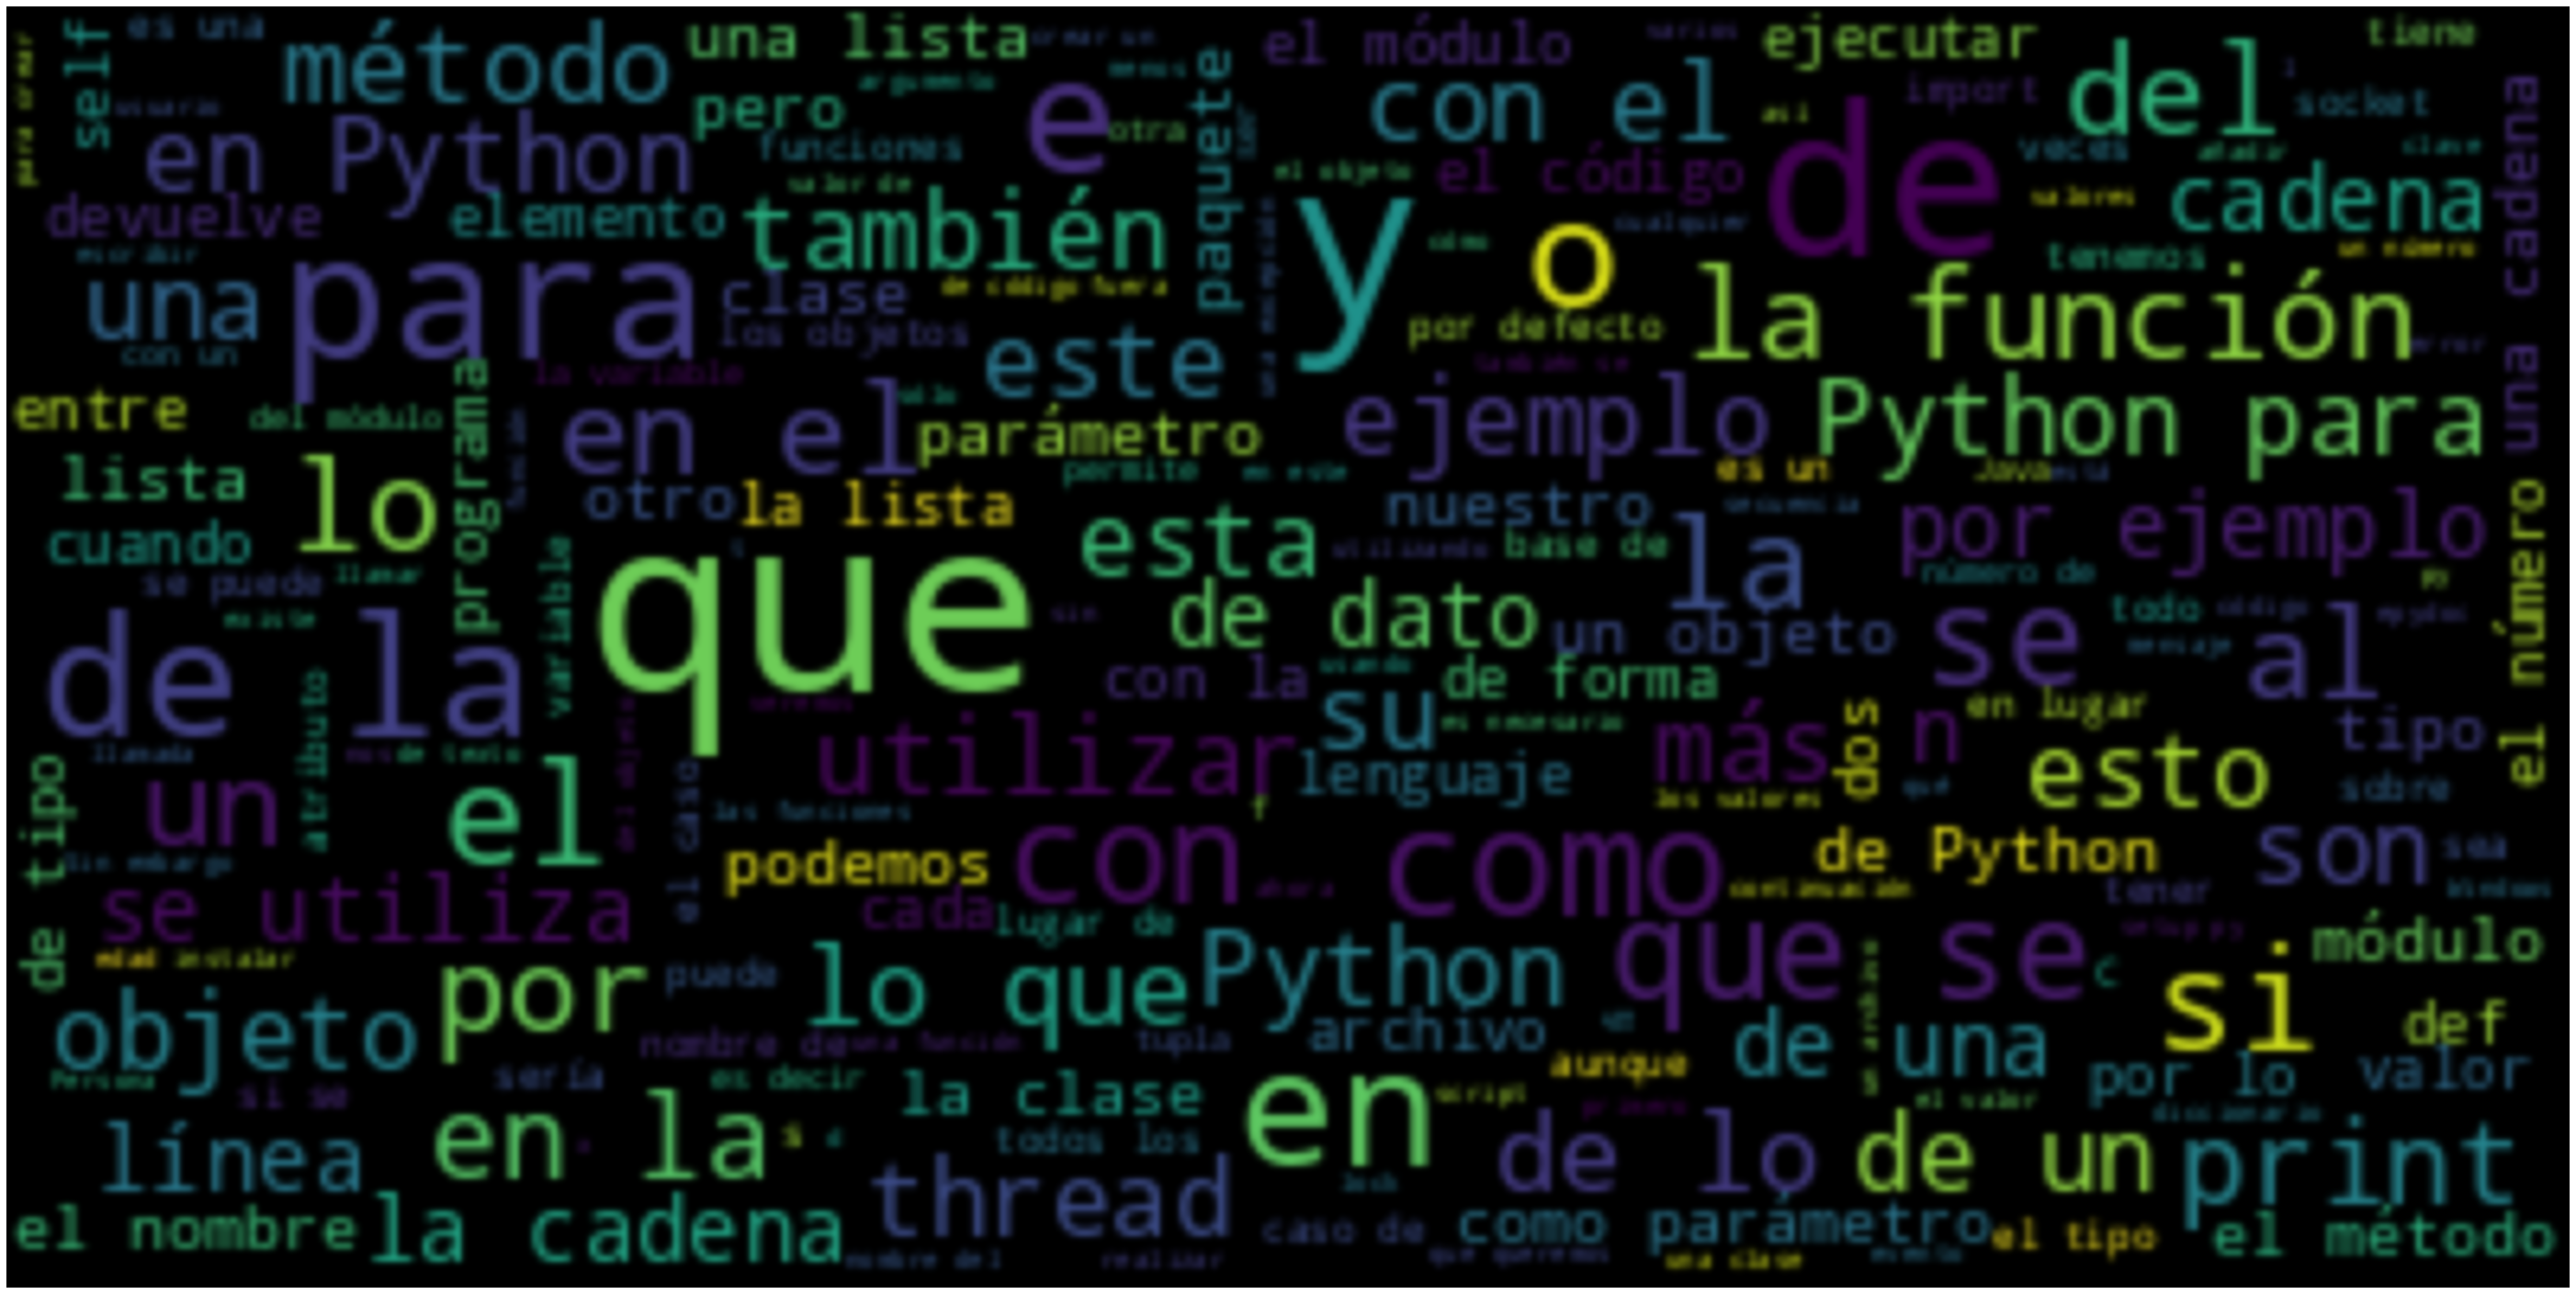

In [17]:
wc = WordCloud(max_font_size=40,max_words=2000,background_color='black').generate(texto)
plt.figure(figsize=[50,50])
plt.imshow(wc, interpolation='gaussian')

plt.axis('off')
plt.show()
# vemos que necesitamos de stopwords ...

In [18]:
# para el caso de un libro que esta en espa;ol no tenemos un stop_words para spa;ol
# en tal caso tendremos que hacer un stopword.

with open('spanish.txt') as f:
    stop_words = f.read().splitlines()
#agregando mas stop words
more_stop_words=['tres','primer','primera','dos','uno','veces', 'así', 'luego', 'quizá','cosa','cosas','tan','asi','andres','todas','sólo','jesús','pablo','pepe']
for pal in more_stop_words:
    stop_words.append(pal)

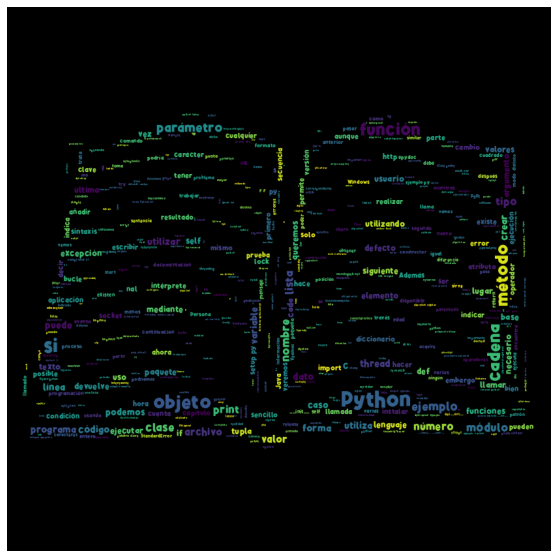

In [19]:
book_color = np.array(Image.open('./book.png'))
book_color = book_color[::3, ::3]
book_mask = book_color.copy()
book_mask[book_mask.sum(axis=2) == 0] = 255
edges = np.mean([gaussian_gradient_magnitude(book_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
book_mask[edges > .08] = 255
wc = WordCloud(font_path='Alphakind.otf',max_words=2000,stopwords=stop_words, mask=book_mask, max_font_size=50)
wc.generate(texto)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wc)

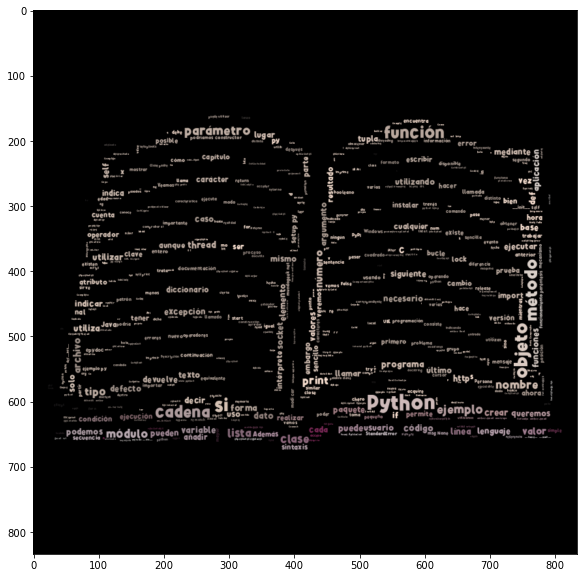

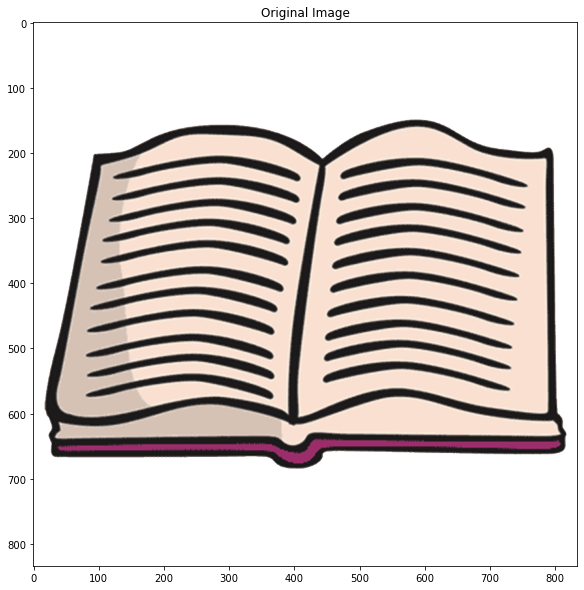

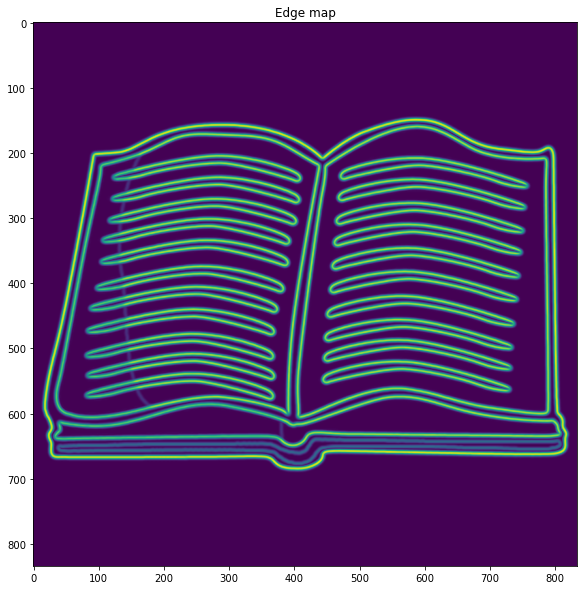

In [10]:
image_colors = ImageColorGenerator(book_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("book_new.png")

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(book_color)

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()